<a href="https://colab.research.google.com/github/jacobledesma10/neuroai-adni-classification/blob/main/notebooks/01_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

pd.set_option("display.max_columns", 100)
sns.set_style("whitegrid")

In [7]:
DATA_DIR = Path("../sample_data")
clinical_path = "/content/sample_data/ADNI_Training_Q1_APOE_July22.2014.csv"

#DATA_DIR = Path("../data/raw")
#clinical_path = DATA_DIR / "ADNI_Training.csv"


df = pd.read_csv(clinical_path)

print("Shape:", df.shape)
df.head()


Shape: (1534, 11)


,RID,PTID,VISCODE,EXAMDATE,DX.bl,AGE,PTGENDER,PTEDUCAT,APOE4,MMSE,APOE Genotype
0,5,011_S_0005,bl,9/7/05,CN,73.7,Male,16,0,29,"3,3"
1,5,011_S_0005,m24,9/7/07,CN,73.7,Male,16,0,29,"3,3"
2,6,100_S_0006,bl,11/29/05,LMCI,80.4,Female,13,0,25,"3,3"
3,6,100_S_0006,m24,11/8/07,LMCI,80.4,Female,13,0,26,"3,3"
4,30,023_S_0030,bl,10/20/05,LMCI,80.0,Female,19,0,29,"3,3"


In [10]:
df.columns

Index(['RID', 'PTID', 'VISCODE', 'EXAMDATE', 'DX.bl', 'AGE', 'PTGENDER',
       'PTEDUCAT', 'APOE4', 'MMSE', 'APOE Genotype'],
      dtype='object')

In [12]:
cols = [
    'RID',
    'VISCODE',
    'EXAMDATE',
    'DX.bl',
    'AGE',
    'PTGENDER',
    'PTEDUCAT',
    'APOE4',
    'MMSE',
    'APOE Genotype'
]

df_sub = df[cols].copy()
df_sub.head()

,RID,VISCODE,EXAMDATE,DX.bl,AGE,PTGENDER,PTEDUCAT,APOE4,MMSE,APOE Genotype
0,5,bl,9/7/05,CN,73.7,Male,16,0,29,"3,3"
1,5,m24,9/7/07,CN,73.7,Male,16,0,29,"3,3"
2,6,bl,11/29/05,LMCI,80.4,Female,13,0,25,"3,3"
3,6,m24,11/8/07,LMCI,80.4,Female,13,0,26,"3,3"
4,30,bl,10/20/05,LMCI,80.0,Female,19,0,29,"3,3"


In [18]:
df_sub["DX.bl"].value_counts()


,count
DX.bl,
LMCI,546
CN,482
EMCI,260
AD,246


In [19]:
# Keep only baseline visits
df_base = df_sub[df_sub["VISCODE"] == "bl"].copy()

# Filter to CN / EMCI / AD
df_base = df_base[df_base["DX.bl"].isin(["CN", "EMCI", "AD"])]

df_base["DX.bl"].value_counts()

,count
DX.bl,
CN,241
EMCI,130
AD,123


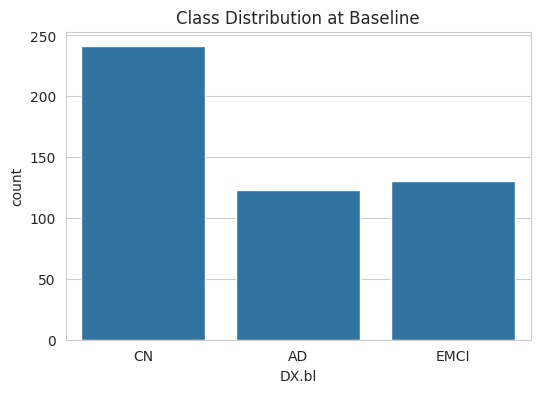

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_base, x="DX.bl")
plt.title("Class Distribution at Baseline")
plt.show()


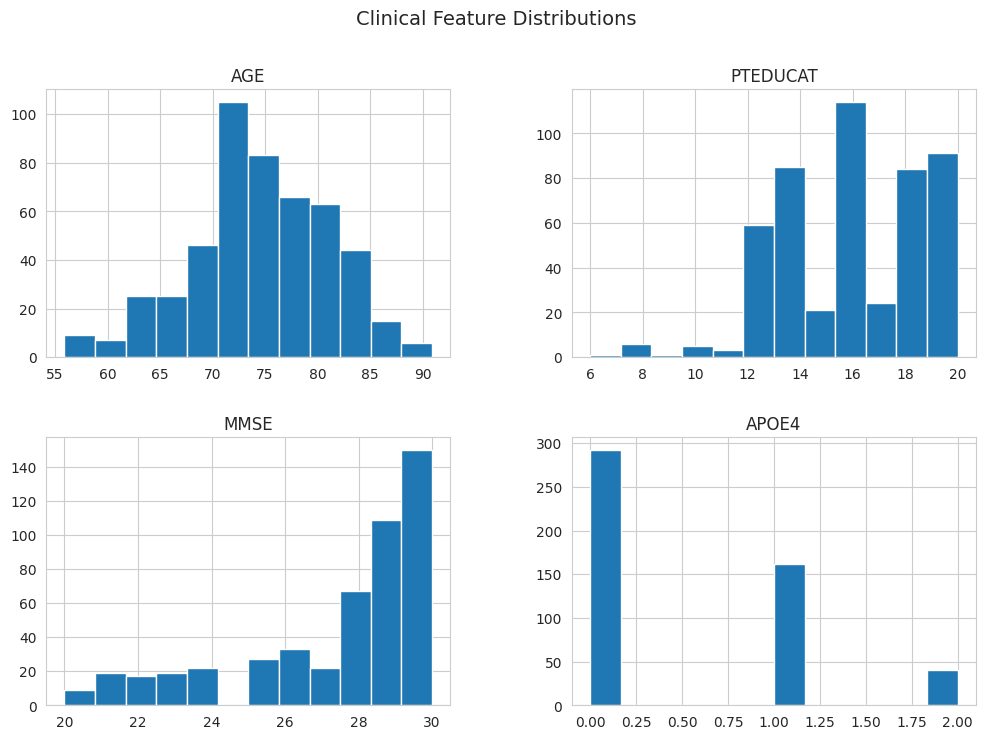

In [30]:
num_cols = ['AGE', 'PTEDUCAT', 'MMSE', 'APOE4']

df_clean[num_cols].hist(bins=12, figsize=(12,8))
plt.suptitle("Clinical Feature Distributions", fontsize=14)
plt.show()

In [31]:
df_clean["GENDER"] = df_clean["PTGENDER"].map({"Male": 1, "Female": 0})

In [37]:
features = ["AGE", "GENDER", "PTEDUCAT", "MMSE", "APOE4", "APOE Genotype"]
X = df_clean[features]
y = df_clean["DX.bl"]

print(X.shape, y.shape)
df_clean.head()

(494, 6) (494,)


,RID,VISCODE,EXAMDATE,DX.bl,AGE,PTGENDER,PTEDUCAT,APOE4,MMSE,APOE Genotype,GENDER
0,5,bl,9/7/05,CN,73.7,Male,16,0,29,"3,3",1
6,31,bl,10/24/05,CN,77.7,Female,18,0,30,"3,3",0
10,35,bl,11/8/05,CN,76.9,Male,18,0,30,"3,3",1
14,43,bl,2/3/06,CN,76.2,Male,16,0,29,"2,3",1
16,47,bl,12/15/05,CN,84.7,Male,20,0,30,"2,3",1


In [ ]:
PROCESSED_DIR = Path("../data/processed")
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

out_path = PROCESSED_DIR / "adni_baseline_tabular.csv"
df_clean.to_csv(out_path, index=False)

print(f"Saved to: {out_path}")